In [1]:
from sympy import *
import numpy as np
from sympy import DiracDelta
import itertools
import math
import random

In [2]:
from sympy import init_printing
init_printing() 

In [3]:
x, y, z, u, dx, dy, dz = symbols('x y z u dx dy dz',real=True,positive=True)
K0, K1, K2, K3 = symbols('K0 K1 K2 K3',real=True)
m0, m1, m2, m3, E1, E2, E3 = symbols('m0 m1 m2 m3 E1 E2 E3',real=True,positive=True)
p1, p2, p3 = symbols('p1 p2 p3',real=True,positive=True)

theta1, theta2, theta3, phi1, phi2, phi3 = symbols('theta1 theta2 theta3 phi1 phi2 phi3',real=True,positive=True)

In [4]:
Identity = Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
Gamma0 = Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, -1, 0], [0, 0, 0, -1]])
Gamma1 = Matrix([[0, 0, 0, 1], [0, 0, 1, 0], [0, -1, 0, 0], [-1, 0, 0,0]])
Gamma2 = Matrix([[0, 0, 0, -I], [0, 0, I, 0], [0, I, 0, 0], [-I, 0, 0, 0]])
Gamma3 = Matrix([[0, 0, 1, 0], [0, 0, 0, -1], [-1, 0, 0, 0], [0, 1, 0, 0]])
Gamma5 = I*Gamma0*Gamma1*Gamma2*Gamma3

CoGamma0 = Gamma0
CoGamma1 = -Gamma1
CoGamma2 = -Gamma2
CoGamma3 = -Gamma3
CoGamma5 = Gamma5

TwoPR = (Identity + Gamma5)
TwoPL = (Identity - Gamma5)


In [5]:
N1 = sqrt(E1+m1) #sqrt(p1**2+2*m1**2)
N2 = sqrt(E2+m2)
N3 = sqrt(E3+m3)
con1 = p1/(m1+E1) # p1/(m1+sqrt(p1**2+m1**2))
con2 = p2/(m2+E2)
con3 = p3/(m3+E3)
s1 = sqrt((1-cos(theta1))/2) # sin(theta1/2)
s2 = sqrt((1-cos(theta2))/2) # sin(theta2/2)
s3 = sqrt((1-cos(theta3))/2) # sin(theta3/2)
c1 = sqrt((1+cos(theta1))/2) # cos(theta1/2)
c2 = sqrt((1+cos(theta2))/2) # cos(theta2/2)
c3 = sqrt((1+cos(theta3))/2) # cos(theta3/2)
#e1 = exp(phi1)
#e2 = exp(phi2)
#e3 = exp(phi3)
ei1 = exp(I*phi1)
ei2 = exp(I*phi2)
ei3 = exp(I*phi3)

In [6]:
N1 = sqrt(E1+m1) #sqrt(p1**2+2*m1**2)
N2 = sqrt(E2+m2)
N3 = sqrt(E3+m3)
con1 = 1- m1/p1 #p1/(m1+E1) # p1/(m1+sqrt(p1**2+m1**2))
con2 = 1- m2/p2 #p2/(m2+E2)
con3 = 1- m3/p3 #p3/(m3+E3)
s1 =  sin(theta1/2)
s2 =  sin(theta2/2)
s3 =  sin(theta3/2)
c1 =  cos(theta1/2)
c2 =  cos(theta2/2)
c3 =  cos(theta3/2)
ei1 = cos(phi1)+I*sin(phi1) #exp(I*phi1)
ei2 = cos(phi2)+I*sin(phi2)  #exp(I*phi2)
ei3 = cos(phi3)+I*sin(phi3)  #exp(I*phi3)

v0up = sqrt(2*m0)*Matrix([0,0,0,1])
v0dn = sqrt(2*m0)*Matrix([0,0,1,0])

v1up = N1*Matrix([con1*s1,-con1*c1*ei1,-s1,c1*ei1])
v1dn = N1*Matrix([con1*c1,con1*s1*ei1,c1,s1*ei1])

v3up = N3*Matrix([con3*s3,-con3*c3*ei3,-s3,c3*ei3])
v3dn = N3*Matrix([con3*c3,con3*s3*ei3,c3,s3*ei3])

u2up = N2*Matrix([c2,s2*ei2,con2*c2,con2*s2*ei2])
u2dn = N2*Matrix([-s2,c2*ei2,con2*s2,-con2*c2*ei2])

In [ ]:
v1up

In [5]:
s1 =  sin(theta1/2)
s2 =  sin(theta2/2)
s3 =  sin(theta3/2)
c1 =  cos(theta1/2)
c2 =  cos(theta2/2)
c3 =  cos(theta3/2)
ei1 = cos(phi1)+I*sin(phi1) #exp(I*phi1)
ei2 = cos(phi2)+I*sin(phi2)  #exp(I*phi2)
ei3 = cos(phi3)+I*sin(phi3)  #exp(I*phi3)

AA = (sqrt(p1) -m1/(2*sqrt(p1)))
A  = (sqrt(p1) +m1/(2*sqrt(p1)))
BB = (sqrt(p3) -m3/(2*sqrt(p3)))
B  = (sqrt(p3) +m3/(2*sqrt(p3)))
CC = (sqrt(p2) -m2/(2*sqrt(p2)))
C  = (sqrt(p2) +m2/(2*sqrt(p2)))

v0up = sqrt(2*m0)*Matrix([0,0,0,1])
v0dn = sqrt(2*m0)*Matrix([0,0,1,0])

v1up = Matrix([AA*s1,-AA*c1*ei1,-A*s1,A*c1*ei1])
v1dn = Matrix([AA*c1,AA*s1*ei1,A*c1,A*s1*ei1])

con3 = p3/(m3+E3)
N3 = sqrt(E3+m3)
v3up = N3*Matrix([con3*s3,-con3*c3*ei3,-s3,c3*ei3])
v3dn = N3*Matrix([con3*c3,con3*s3*ei3,c3,s3*ei3])

u2up = Matrix([C*c2,C*s2*ei2,CC*c2,CC*s2*ei2])
u2dn = Matrix([-C*s2,C*c2*ei2,CC*s2,-CC*c2*ei2])

In [6]:
E1simp = p1 + m1**2/(2*p1)
E2simp = p2 + m2**2/(2*p2)

E3simp = m0-p1-m1**2/(2*p1)-p2-m2**2/(2*p2)
p3simp = sqrt(p1**2+p2**2+2*p1*p2*(cos(theta1)*cos(theta2)+cos(phi1-phi2)*sin(theta1)*sin(theta2)))
C3simp = acos((p1*cos(theta1)+p2*cos(theta2))/p3)
#S3simp = (p1*sin(theta1)*sin(phi1)+p2*sin(theta2)*sin(phi2))/p3
p2simp = -p1*(sin(theta1)*cos(phi1))/(sin(theta2)*cos(phi2))

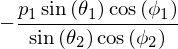

In [7]:
p2simp

In [8]:
SUBS = [(phi3,pi/2),(E1,E1simp),(E2,E2simp),(E3,E3simp),(theta3,C3simp),(p3,p3simp),(p2,p2simp)]

In [28]:
solve(m0-p1-m1**2/(2*p1)-p2-m2**2/(2*p2)-sqrt(p1**2+p2**2+2*p1*p2*(u)-m3**2), p2)

KeyboardInterrupt: 

In [9]:
v1up = v1up.subs(SUBS)
v1dn = v1dn.subs(SUBS)

v3up = v3up.subs(SUBS)
v3dn = v3dn.subs(SUBS)

u2up = u2up.subs(SUBS)
u2dn = u2dn.subs(SUBS)

In [16]:
Gf = 1#1.16636e-5
rt2 = sqrt(2)
def element(a,b,c,d):
    return Gf/rt2*(a.T*Gamma0*Gamma0*TwoPL*b*c.T*Gamma0*CoGamma0*TwoPL*d + \
            a.T*Gamma0*Gamma1*TwoPL*b*c.T*Gamma0*CoGamma1*TwoPL*d + \
             a.T*Gamma0*Gamma2*TwoPL*b*c.T*Gamma0*CoGamma2*TwoPL*d + \
              a.T*Gamma0*Gamma3*TwoPL*b*c.T*Gamma0*CoGamma3*TwoPL*d)

In [11]:
tet1   = element(v0up, v1up, u2up, v3up)*conjugate(element(v0up, v1up, u2up, v3up))
tet2   = element(v0up, v1dn, u2up, v3up)*conjugate(element(v0up, v1dn, u2up, v3up))
tet3   = element(v0up, v1up, u2dn, v3up)*conjugate(element(v0up, v1up, u2dn, v3up))
tet4   = element(v0up, v1up, u2up, v3dn)*conjugate(element(v0up, v1up, u2up, v3dn))
tet5   = element(v0up, v1dn, u2dn, v3up)*conjugate(element(v0up, v1dn, u2dn, v3up))
tet6   = element(v0up, v1dn, u2up, v3dn)*conjugate(element(v0up, v1dn, u2up, v3dn))
tet7   = element(v0up, v1dn, u2dn, v3dn)*conjugate(element(v0up, v1dn, u2dn, v3dn))
tet8   = element(v0up, v1up, u2dn, v3dn)*conjugate(element(v0up, v1up, u2dn, v3dn))

In [12]:
tet9   = element(v0dn, v1up, u2up, v3up)*conjugate(element(v0dn, v1up, u2up, v3up))
tet10  = element(v0dn, v1dn, u2up, v3up)*conjugate(element(v0dn, v1dn, u2up, v3up))
tet11  = element(v0dn, v1up, u2dn, v3up)*conjugate(element(v0dn, v1up, u2dn, v3up))
tet12  = element(v0dn, v1up, u2up, v3dn)*conjugate(element(v0dn, v1up, u2up, v3dn))
tet13  = element(v0dn, v1dn, u2dn, v3up)*conjugate(element(v0dn, v1dn, u2dn, v3up))
tet14  = element(v0dn, v1dn, u2up, v3dn)*conjugate(element(v0dn, v1dn, u2up, v3dn))
tet15  = element(v0dn, v1dn, u2dn, v3dn)*conjugate(element(v0dn, v1dn, u2dn, v3dn))
tet16  = element(v0dn, v1up, u2dn, v3dn)*conjugate(element(v0dn, v1up, u2dn, v3dn))

In [17]:
tet1  = element(v0up, v1up, u2up, v3up)*conjugate(element(v0up, v1up, u2up, v3up))

In [18]:
PutIn=[(m0,50),(m3,0.778),(m1,0.023),(m2,0.56),(p1,0.01),(theta1,1.2),(theta2,1),(phi1,0.5),(phi2,2)]

In [19]:
N(element(v0up, v1up, u2up, v3up).subs(PutIn))

In [20]:
N(tet1.subs(PutIn))

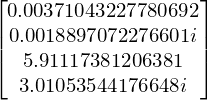

In [15]:
N(v3dn.subs(PutIn))

In [ ]:
TT = C3simp.subs(SUBS)
N(TT.subs(PutIn))

In [ ]:
TT = p3simp.subs(SUBS)
N(TT.subs(PutIn))

In [ ]:
p3simp

In [ ]:
C3simp

In [21]:
'dtheta1 dtheta2 dhpi1 dphi2 dp1 ===> sub in the other stuff'
dLIPS = 1/(64*(math.pi)**5*m0)*1/(E1*E2*E3)*p1**2*p2**2*p3**2*sin(theta1)*sin(theta2)

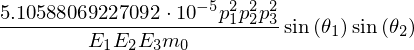

In [22]:
dLIPS

In [23]:
dLIPS = dLIPS.subs(SUBS)
#dLIPS = dLIPS.subs(Masses)

In [24]:
N(dLIPS.subs(PutIn))

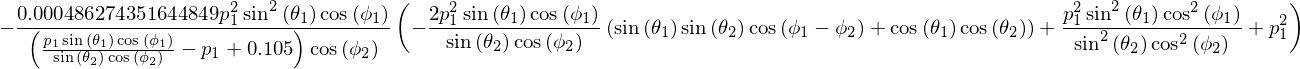

In [41]:
dLIPS

In [16]:
Masses = [(m0,105e-3),(m3,500e-6),(m1,0),(m2,0),(u,1.16636e-5)]
#Masses = [(m0,105e-3),(m3,0),(m1,0),(m2,0)]

In [17]:
Matrix = tet1+tet2+tet3+tet4+tet5+tet6+tet7+tet8+tet9+tet10+tet11+tet12+tet13+tet14+tet15+tet16

In [18]:
ELEMENT = Matrix*dLIPS
ELEMENT = ELEMENT.subs(Masses)

In [18]:
import itertools
import math
import random
import numpy as np
import time


def integrate(integrand, sampler, measure=1.0, n=100):
    # Sum elements and elements squared
    total = 0.0
    total_sq = 0.0
    for x in itertools.islice(sampler, n):
        f = integrand(x)
        total += f
        total_sq += (f**2)
    # Return answer
    sample_mean = total/n
    sample_var = (total_sq - ((total/n)**2)/n)/(n-1.0)
    #return (measure*sample_mean, measure*math.sqrt(sample_var/n))
    return (measure*sample_mean)

In [19]:
Masses = [(m0,105e-3),(m3,500e-6),(m1,0),(m2,0),(u,1.16636e-5)]

In [20]:
tet1   = (element(v0up, v1up, u2up, v3up)*conjugate(element(v0up, v1up, u2up, v3up))).subs(Masses)
tet2   = (element(v0up, v1dn, u2up, v3up)*conjugate(element(v0up, v1dn, u2up, v3up))).subs(Masses)
tet3   = (element(v0up, v1up, u2dn, v3up)*conjugate(element(v0up, v1up, u2dn, v3up))).subs(Masses)
tet4   = (element(v0up, v1up, u2up, v3dn)*conjugate(element(v0up, v1up, u2up, v3dn))).subs(Masses)
tet5   = (element(v0up, v1dn, u2dn, v3up)*conjugate(element(v0up, v1dn, u2dn, v3up))).subs(Masses)
tet6   = (element(v0up, v1dn, u2up, v3dn)*conjugate(element(v0up, v1dn, u2up, v3dn))).subs(Masses)
tet7   = (element(v0up, v1dn, u2dn, v3dn)*conjugate(element(v0up, v1dn, u2dn, v3dn))).subs(Masses)
tet8   = (element(v0up, v1up, u2dn, v3dn)*conjugate(element(v0up, v1up, u2dn, v3dn))).subs(Masses)
tet9   = (element(v0dn, v1up, u2up, v3up)*conjugate(element(v0dn, v1up, u2up, v3up))).subs(Masses)
tet10  = (element(v0dn, v1dn, u2up, v3up)*conjugate(element(v0dn, v1dn, u2up, v3up))).subs(Masses)
tet11  = (element(v0dn, v1up, u2dn, v3up)*conjugate(element(v0dn, v1up, u2dn, v3up))).subs(Masses)
tet12  = (element(v0dn, v1up, u2up, v3dn)*conjugate(element(v0dn, v1up, u2up, v3dn))).subs(Masses)
tet13  = (element(v0dn, v1dn, u2dn, v3up)*conjugate(element(v0dn, v1dn, u2dn, v3up))).subs(Masses)
tet14  = (element(v0dn, v1dn, u2up, v3dn)*conjugate(element(v0dn, v1dn, u2up, v3dn))).subs(Masses)
tet15  = (element(v0dn, v1dn, u2dn, v3dn)*conjugate(element(v0dn, v1dn, u2dn, v3dn))).subs(Masses)
tet16  = (element(v0dn, v1up, u2dn, v3dn)*conjugate(element(v0dn, v1up, u2dn, v3dn))).subs(Masses)

In [21]:
def integrand(x):
    Momentum = x[0]
    ThetaOne = x[1]
    ThetaTwo = x[2]
    PhiOne   = x[3]
    PhiTwo   = x[4]
    Values   = [(p1,Momentum),(theta1,ThetaOne),(theta2,ThetaTwo),(phi1,PhiOne),(phi2,PhiTwo)]
    M1=tet1.subs(Values) ; M5=tet5.subs(Values) ;M9=tet9.subs(Values)   ;M13=tet13.subs(Values)
    M2=tet2.subs(Values) ; M6=tet6.subs(Values) ;M10=tet10.subs(Values) ;M14=tet14.subs(Values)    
    M3=tet3.subs(Values) ; M7=tet7.subs(Values) ;M11=tet11.subs(Values) ;M15=tet15.subs(Values)
    M4=tet4.subs(Values) ; M8=tet8.subs(Values) ;M12=tet12.subs(Values) ;M16=tet16.subs(Values)
    This     = M1+M2+M3+M4+M5+M6+M7+M8+M9+M10+M11+M12+M13+M14+M15+M16
    return abs(This[0])
    #return np.real(This)

def sampler():
    while True:
        Momentum = random.uniform(0.,0.0525)#half m0
        ThetaOne = random.uniform(0.,math.pi)
        ThetaTwo = random.uniform(0.,math.pi)
        PhiOne   = random.uniform(0.,2*math.pi)
        PhiTwo   = random.uniform(0.,2*math.pi)
        
        yield (Momentum, ThetaOne, ThetaTwo, PhiOne, PhiTwo)

domainsize = math.pow(math.pi,4)*4*0.0525


In [22]:
t1 = time.time()
print(integrate(integrand, sampler(), measure=domainsize, n=100))
t2 = time.time()
print(t2-t1)

0.204559091171405*Abs(6.801978248e-11*(-1.72207289145795e-6*sqrt(2) - 1.86132045423695e-6*sqrt(2)*I*(0.83574356076353 - 0.549119932840082*I))*(-1.72207289145795e-6*sqrt(2) + 1.86132045423695e-6*sqrt(2)*I*(0.83574356076353 + 0.549119932840082*I)) + 6.801978248e-11*(-7.14299878302451e-11*sqrt(2) + 5.8461187500149e-5*sqrt(2)*I*(0.83574356076353 - 0.549119932840082*I))*(-7.14299878302451e-11*sqrt(2) - 5.8461187500149e-5*sqrt(2)*I*(0.83574356076353 + 0.549119932840082*I)) + 6.801978248e-11*(-1.01785602647908e-10*sqrt(2)*(0.844081630145712 + 0.536214697346648*I) + 8.33054489013285e-5*sqrt(2)*I*(0.83574356076353 - 0.549119932840082*I)*(0.844081630145712 + 0.536214697346648*I))*(-8.33054489013285e-5*sqrt(2)*I*(0.83574356076353 + 0.549119932840082*I)*(0.844081630145712 - 0.536214697346648*I) - 1.01785602647908e-10*sqrt(2)*(0.844081630145712 - 0.536214697346648*I)) + 6.801978248e-11*(-2.45390251888653e-6*sqrt(2)*(0.844081630145712 - 0.536214697346648*I) + 2.65232614354675e-6*sqrt(2)*I*(0.8357435

In [24]:
def integrand(x):
    Momentum = x[0]
    ThetaOne = x[1]
    ThetaTwo = x[2]
    PhiOne   = x[3]
    PhiTwo   = x[4]
    Values   = [(p1,Momentum),(theta1,ThetaOne),(theta2,ThetaTwo),(phi1,PhiOne),(phi2,PhiTwo)]
    This     = N(ELEMENT.subs(Values))[0]
    return abs(This)
    #return np.real(This)

def sampler():
    while True:
        Momentum = random.uniform(0.,0.0525)#half m0
        ThetaOne = random.uniform(0.,math.pi)
        ThetaTwo = random.uniform(0.,math.pi)
        PhiOne   = random.uniform(0.,2*math.pi)
        PhiTwo   = random.uniform(0.,2*math.pi)
        
        yield (Momentum, ThetaOne, ThetaTwo, PhiOne, PhiTwo)

domainsize = math.pow(math.pi,4)*4*0.0525

In [25]:
t1 = time.time()
print(integrate(integrand, sampler(), measure=domainsize, n=100))
t2 = time.time()
print(t2-t1)

1.02743866560034e-10
42.227355003356934


In [26]:
t1 = time.time()
print(integrate(integrand, sampler(), measure=domainsize, n=100))
t2 = time.time()
print(t2-t1)

2.24394745714368e-10
43.35280895233154


In [27]:
t1 = time.time()
print(integrate(integrand, sampler(), measure=domainsize, n=100))
t2 = time.time()
print(t2-t1)

5.86343426504037e-16
42.93415021896362


In [32]:
def integrand(x):
    Momentum = x[0]
    ThetaOne = x[1]
    ThetaTwo = x[2]
    PhiOne   = x[3]
    PhiTwo   = x[4]
    Values   = [(p1,Momentum),(theta1,ThetaOne),(theta2,ThetaTwo),(phi1,PhiOne),(phi2,PhiTwo)]
    This     = N(ELEMENT.subs(Values))[0]
    #return abs(This)
    return np.real(This)

def sampler():
    while True:
        Momentum = random.uniform(0.,0.0525)#half m0
        ThetaOne = random.uniform(0.,math.pi)
        ThetaTwo = random.uniform(0.,math.pi)
        PhiOne   = random.uniform(0.,2*math.pi)
        PhiTwo   = random.uniform(0.,2*math.pi)
        
        yield (Momentum, ThetaOne, ThetaTwo, PhiOne, PhiTwo)

domainsize = math.pow(math.pi,4)*4*0.0525

In [33]:
t1 = time.time()
print(integrate(integrand, sampler(), measure=domainsize, n=100))
t2 = time.time()
print(t2-t1)

1.84910101564077e-19 - 2.54594869917009e-59*I
46.727437019348145


In [ ]:

def w(r, theta, phi, alpha, beta, gamma):
    return(-math.log(theta * beta))

def integrand(x):
    r     = x[0]
    theta = x[1]
    alpha = x[2]
    beta  = x[3]
    gamma = x[4]
    phi   = x[5]

    k = 1.
    T = 1.
    ww = w(r, theta, phi, alpha, beta, gamma)
    return (math.exp(-ww/(k*T)) - 1.)*r*r*math.sin(beta)*math.sin(theta)

def sampler():
    while True:
        r     = random.uniform(0.,1.)
        theta = random.uniform(0.,2.*math.pi)
        alpha = random.uniform(0.,2.*math.pi)
        beta  = random.uniform(0.,2.*math.pi)
        gamma = random.uniform(0.,2.*math.pi)
        phi   = random.uniform(0.,math.pi)
        yield (r, theta, alpha, beta, gamma, phi)

domainsize = math.pow(2*math.pi,4)*math.pi*1
expected = 16*math.pow(math.pi,5)/3.


for nmc in [1000, 10000]:
    random.seed(1)
    result, error = integrate(integrand, sampler(), measure=domainsize, n=nmc)

    print( "Using n = ", nmc)
    print( "Result = ", result, "estimated error = ", error)


In [ ]:
sampler()

In [ ]:
qwer = cos(z+u/2)

In [ ]:
a = N(qwer.subs([(z,1),(u,0)]))


In [ ]:
test = integrand((1,1,1,1,1))

In [ ]:
test[0].dtype

In [ ]:
abs(-3)

In [ ]:
def integrand(x):
    Momentum = x[0]
    ThetaOne = x[1]
    ThetaTwo = x[2]
    PhiOne   = x[3]
    PhiTwo   = x[4]
    Values   = [(p1,Momentum),(theta1,ThetaOne),(theta2,ThetaTwo),(phi1,PhiOne),(phi2,PhiTwo)]
    This     = np.array(N(ELEMENT.subs(Values))[0])
    return This.real

def sampler():
    while True:
        Momentum = random.uniform(0.,1.)
        ThetaOne = random.uniform(0.,math.pi)
        ThetaTwo = random.uniform(0.,math.pi)
        PhiOne   = random.uniform(0.,2*math.pi)
        PhiTwo   = random.uniform(0.,2*math.pi)
        
        yield (Momentum, ThetaOne, ThetaTwo, PhiOne, PhiTwo)

domainsize = math.pow(math.pi,4)*4


In [ ]:
integrate(integrand, sampler(), measure=1, n=100)

In [ ]:
result, error = integrate(integrand, sampler(), measure=1, n=100)
print( "Result = ", result, "estimated error = ", error)

In [ ]:
Momentum

In [ ]:

def integrand(x):
    Momentum = x[0]
    ThetaOne = x[1]
    ThetaTwo = x[2]
    PhiOne   = x[3]
    PhiTwo   = x[4]
    
    return N(ELEMENT.subs([(z,r),(u,theta)]))

def sampler():
    while True:
        r     = random.uniform(-math.pi/2,math.pi/2)
        theta = random.uniform(0.,math.pi)
        
        yield (r, theta)

domainsize = math.pow(math.pi,2)*1



for nmc in [1000, 10000, 100000, 1000000]:
    random.seed(1)
    result, error = integrate(integrand, sampler(), measure=domainsize, n=nmc)

    print( "Using n = ", nmc)
    print( "Result = ", result, "estimated error = ", error)